In [41]:
import json
import time
import pickle
from copy import deepcopy
import matplotlib.pyplot as plt
from datetime import datetime 
import math
# %matplotlib notebook

In [5]:
with open('rftdat.pkl', 'rb') as readfile:
    jsdata = pickle.load(readfile)

In [6]:
jsdata

[{'id': 8816306197,
  'user_id': 0,
  'time': 1694664951.0,
  'platform': 'android',
  'is_beginner': True,
  'level': 'Dawn',
  'country_code': 'US',
  'game_server': 'NCok0c6i',
  'fps': 31.28,
  'position_x': 122.56,
  'position_y': 4.49,
  'position_z': 291.02,
  'session_id': '06a23532-5397-48c4-9194-aeb597a818e8',
  'oneSecondAggregatedEventCounts': {'map_shrine_used': 1}},
 {'id': 8816306198,
  'user_id': 1,
  'time': 1694664951.0,
  'platform': 'android',
  'is_beginner': True,
  'level': 'Dawn',
  'country_code': 'CA',
  'game_server': 'EuxdNAyj',
  'fps': 21.93,
  'position_x': 373.76,
  'position_y': 97.57,
  'position_z': 14.57,
  'session_id': '9213ef4a-9cbe-4c08-b86b-dd83137beb50',
  'oneSecondAggregatedEventCounts': {'ping': 1}},
 {'id': 8816306200,
  'user_id': 2,
  'time': 1694664951.0,
  'platform': 'iphoneos',
  'is_beginner': True,
  'level': 'Dawn',
  'country_code': 'TW',
  'game_server': 'NrkkgEqm',
  'fps': 29.98,
  'position_x': 145.46,
  'position_y': 3.74,
  

In [34]:
unique_users = set(event['user_id'] for event in jsdata)

In [17]:
def get_user_events(data, user_id):
    user_events = [event for event in data if event['user_id'] == user_id]
    return user_events
    
def get_user_start_playtime_dict(data):
    user_start_playtime_dict = {}

    # start time sits at the bottom of data, so we start from the end
    for i in range(len(data)-1, -1, -1):
        user_event = data[i]
        user_id = user_event['user_id']
        # ignore user alr seen cuz we alr get the last encountered playtime (aka start time)
        if user_id not in user_start_playtime_dict:
            user_start_playtime_dict[user_id] = user_event['time']  

    return user_start_playtime_dict


users_start_playtime = get_user_start_playtime_dict(jsdata)
print(users_start_playtime)


{65201: 1694578552.0, 67984: 1694578552.0, 68231: 1694578552.0, 67605: 1694578552.0, 745: 1694578552.0, 61267: 1694578552.0, 67955: 1694578552.0, 39412: 1694578552.0, 31367: 1694578552.0, 68049: 1694578552.0, 12741: 1694578552.0, 68246: 1694578552.0, 66235: 1694578552.0, 66113: 1694578552.0, 66658: 1694578552.0, 68228: 1694578552.0, 11335: 1694578552.0, 66679: 1694578552.0, 68357: 1694578552.0, 68356: 1694578552.0, 42288: 1694578552.0, 2620: 1694578552.0, 2913: 1694578552.0, 67750: 1694578552.0, 59670: 1694578552.0, 68234: 1694578552.0, 68066: 1694578552.0, 28676: 1694578552.0, 38002: 1694578552.0, 43140: 1694578552.0, 68130: 1694578552.0, 68243: 1694578552.0, 67675: 1694578552.0, 68038: 1694578552.0, 67402: 1694578552.0, 1213: 1694578552.0, 67789: 1694578552.0, 68308: 1694578552.0, 39521: 1694578552.0, 67775: 1694578552.0, 68343: 1694578552.0, 68278: 1694578552.0, 59934: 1694578552.0, 68202: 1694578552.0, 7913: 1694578552.0, 68197: 1694578552.0, 16796: 1694578552.0, 7372: 1694578552.0

In [18]:
def get_user_end_playtime_dict(data):
    user_end_playtime_dict = {}

    # end time sits on the top of data, so we start from the beginning
    for user_event in data:
        # ignore user alr seen cuz we alr get the first encountered playtime (aka end time)
        user_id = user_event['user_id']
        if user_id not in user_end_playtime_dict:
            user_end_playtime_dict[user_id] = user_event['time']

    return user_end_playtime_dict


user_end_playtime = get_user_end_playtime_dict(jsdata)
print(user_end_playtime)

{0: 1694664951.0, 1: 1694664951.0, 2: 1694664951.0, 3: 1694664951.0, 4: 1694664951.0, 5: 1694664951.0, 6: 1694664951.0, 7: 1694664951.0, 8: 1694664951.0, 9: 1694664951.0, 10: 1694664950.0, 11: 1694664950.0, 12: 1694664950.0, 13: 1694664950.0, 14: 1694664950.0, 15: 1694664950.0, 16: 1694664950.0, 17: 1694664950.0, 18: 1694664950.0, 19: 1694664950.0, 20: 1694664950.0, 21: 1694664950.0, 22: 1694664950.0, 23: 1694664950.0, 24: 1694664950.0, 25: 1694664950.0, 26: 1694664950.0, 27: 1694664950.0, 28: 1694664950.0, 29: 1694664950.0, 30: 1694664950.0, 31: 1694664950.0, 32: 1694664950.0, 33: 1694664950.0, 34: 1694664950.0, 35: 1694664950.0, 36: 1694664950.0, 37: 1694664950.0, 38: 1694664950.0, 39: 1694664950.0, 40: 1694664950.0, 41: 1694664950.0, 42: 1694664950.0, 43: 1694664950.0, 44: 1694664950.0, 45: 1694664950.0, 46: 1694664950.0, 47: 1694664950.0, 48: 1694664950.0, 49: 1694664950.0, 50: 1694664950.0, 51: 1694664950.0, 52: 1694664950.0, 53: 1694664950.0, 54: 1694664950.0, 55: 1694664950.0, 5

In [20]:
def get_user_playtime_dict(user_start_playtime_dict, user_end_playtime_dict):
    #key = user_id
    #value = playtime
    #where playtime = abs(float(max(time)) - float(min(time))
    user_playtime_dict = {}

    for user_id in user_end_playtime_dict:
        playtime = abs(user_end_playtime_dict[user_id] - user_start_playtime_dict[user_id])
        user_playtime_dict[user_id] = playtime
        
    return user_playtime_dict
        
user_playtimes = get_user_playtime_dict(users_start_playtime, user_end_playtime)
print(user_playtimes)

{0: 79.0, 1: 202.0, 2: 203.0, 3: 1566.0, 4: 111.0, 5: 891.0, 6: 86399.0, 7: 114.0, 8: 461.0, 9: 1640.0, 10: 762.0, 11: 13.0, 12: 49939.0, 13: 18224.0, 14: 128.0, 15: 233.0, 16: 7104.0, 17: 58846.0, 18: 80998.0, 19: 97.0, 20: 80329.0, 21: 469.0, 22: 671.0, 23: 9637.0, 24: 10.0, 25: 103.0, 26: 10423.0, 27: 199.0, 28: 1606.0, 29: 276.0, 30: 51828.0, 31: 12.0, 32: 36.0, 33: 56062.0, 34: 447.0, 35: 169.0, 36: 80973.0, 37: 71.0, 38: 285.0, 39: 96.0, 40: 729.0, 41: 796.0, 42: 1112.0, 43: 327.0, 44: 44.0, 45: 84241.0, 46: 15.0, 47: 520.0, 48: 598.0, 49: 224.0, 50: 4298.0, 51: 30490.0, 52: 85092.0, 53: 1.0, 54: 6980.0, 55: 12284.0, 56: 817.0, 57: 690.0, 58: 1067.0, 59: 77987.0, 60: 1890.0, 61: 77275.0, 62: 519.0, 63: 71.0, 64: 233.0, 65: 116.0, 66: 25208.0, 67: 0.0, 68: 6393.0, 69: 306.0, 70: 64.0, 71: 530.0, 72: 118.0, 73: 84106.0, 74: 2236.0, 75: 218.0, 76: 181.0, 77: 74.0, 78: 16126.0, 79: 942.0, 80: 84640.0, 81: 69323.0, 82: 2762.0, 83: 503.0, 84: 548.0, 85: 965.0, 86: 86101.0, 87: 1105.0, 

In [58]:
def sum_spirit_shop_item_purchased(data):
    country_counts = {}

    for entry in data:
        country_code = entry['country_code']
        event_counts = entry.get('oneSecondAggregatedEventCounts', {})

        if 'spirit_shop_item_purchased' in event_counts:
            count = event_counts['spirit_shop_item_purchased']
            country_counts[country_code] = country_counts.get(country_code, 0) + count

    return country_counts
result = sum_spirit_shop_item_purchased(jsdata)
#Which country makes the most purchases (spirit_shop_item_purchased)
#key = country_code
#value = num of shop items purchased
result

{'US': 1427,
 'PA': 40,
 'JP': 1165,
 'AR': 102,
 'BR': 482,
 'PH': 301,
 'ID': 419,
 'CA': 119,
 'AU': 55,
 'EG': 58,
 'IQ': 66,
 'NZ': 29,
 'GB': 206,
 'VN': 485,
 'PR': 42,
 'TH': 192,
 'EC': 41,
 'QA': 9,
 'MX': 410,
 'GT': 33,
 'RU': 707,
 'IN': 168,
 'DO': 23,
 'TN': 4,
 'SA': 57,
 'CR': 55,
 'BB': 13,
 'DZ': 42,
 'BO': 34,
 'PT': 36,
 'TW': 175,
 'CN': 222,
 'CL': 113,
 'PE': 37,
 'CO': 100,
 'BY': 78,
 'CH': 29,
 'IR': 1,
 'FR': 160,
 'PY': 25,
 'NL': 35,
 'MA': 35,
 'IT': 113,
 'RS': 7,
 'MM': 89,
 'KR': 113,
 'GR': 13,
 'MY': 338,
 'KW': 11,
 'ES': 95,
 'UY': 5,
 'BE': 17,
 'UA': 53,
 'BD': 8,
 'IE': 6,
 'NG': 10,
 'PK': 8,
 'DE': 221,
 'IL': 15,
 'BZ': 3,
 'VE': 40,
 'RO': 22,
 'AT': 27,
 'LY': 9,
 'GP': 6,
 'MD': 12,
 'TR': 71,
 'JO': 12,
 'FI': 12,
 'HK': 55,
 'KZ': 29,
 'HN': 16,
 'PL': 34,
 'SE': 7,
 'CZ': 14,
 'PS': 6,
 'SV': 15,
 'TT': 6,
 'GE': 11,
 'BG': 18,
 'AE': 18,
 'ZA': 22,
 'SI': 1,
 'BH': 4,
 'LU': 5,
 'AZ': 9,
 'MN': 17,
 'NI': 20,
 'SG': 15,
 'NP': 12,
 'IS

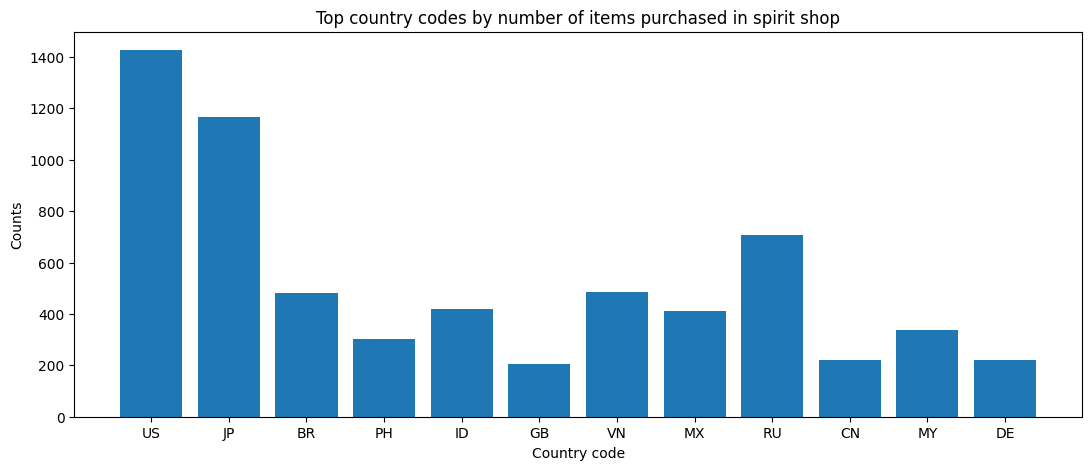

In [89]:
kv = []
vv = []
for key, value in result.items():
    if value > 200:
        kv.append(key)
        vv.append(value)

fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(vv))
hbars = ax.bar(y_pos, vv, align='center')
ax.set_xticks(y_pos, labels=list(kv));

plt.xlabel('Country code')
plt.ylabel('Counts')
plt.title('Top country codes by number of items purchased in spirit shop');

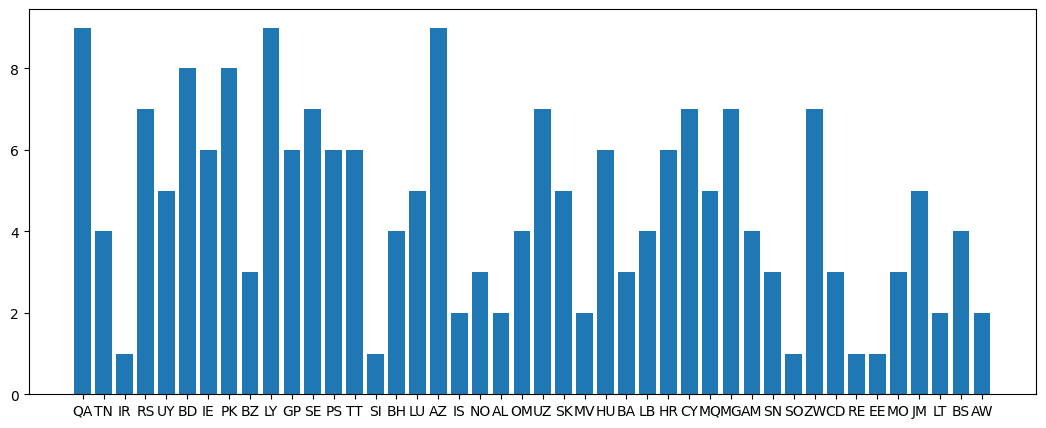

In [72]:
kv = []
vv = []
for key, value in result.items():
    if value < 10:
        kv.append(key)
        vv.append(value)

fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(vv))
hbars = ax.bar(y_pos, vv, align='center')
ax.set_xticks(y_pos, labels=list(kv));

In [21]:
def find_ids_with_event_counts(json_objects):
    """
    Find "user_id"s in a list of JSON objects and collect their different oneSecondAggregatedEventCounts.

    Args:
        json_objects (list): A list of JSON objects.

    Returns:
        dict: A dictionary where keys are "user_id"s, and values are lists of different oneSecondAggregatedEventCounts events.
    """
    user_event_counts = {}

    for obj in json_objects:
        user_id = obj["user_id"]
        event_counts = obj["oneSecondAggregatedEventCounts"]
        
        if user_id not in user_event_counts:
            user_event_counts[user_id] = {}
        
        for k in event_counts.keys():
            if k not in user_event_counts[user_id]:
                user_event_counts[user_id][k] = event_counts[k]
            else:
                user_event_counts[user_id][k] += event_counts[k]

    return user_event_counts

In [31]:
user_event_counts = find_ids_with_event_counts(jsdata)

In [36]:
def get_pings_per_user():
    user_ping_dict_count = {}
    
    for user_id in user_event_counts.keys():
        user_ping_dict_count[user_id] = 1 if 'ping' not in user_event_counts[user_id] else user_event_counts[user_id]['ping']   

    return user_ping_dict_count

user_pings = get_pings_per_user()
print(user_pings)

{0: 13, 1: 74, 2: 21, 3: 70, 4: 26, 5: 71, 6: 536, 7: 39, 8: 97, 9: 196, 10: 247, 11: 8, 12: 292, 13: 305, 14: 58, 15: 26, 16: 134, 17: 352, 18: 443, 19: 34, 20: 181, 21: 148, 22: 148, 23: 85, 24: 1, 25: 39, 26: 260, 27: 78, 28: 286, 29: 50, 30: 1169, 31: 5, 32: 21, 33: 540, 34: 37, 35: 45, 36: 423, 37: 4, 38: 71, 39: 41, 40: 126, 41: 94, 42: 119, 43: 80, 44: 19, 45: 241, 46: 5, 47: 121, 48: 48, 49: 98, 50: 236, 51: 830, 52: 268, 53: 1, 54: 136, 55: 246, 56: 81, 57: 73, 58: 108, 59: 156, 60: 262, 61: 140, 62: 271, 63: 11, 64: 105, 65: 17, 66: 69, 67: 1, 68: 231, 69: 40, 70: 14, 71: 63, 72: 23, 73: 219, 74: 126, 75: 86, 76: 5, 77: 21, 78: 341, 79: 94, 80: 47, 81: 300, 82: 353, 83: 187, 84: 72, 85: 121, 86: 133, 87: 138, 88: 155, 89: 104, 90: 302, 91: 166, 92: 142, 93: 43, 94: 213, 95: 149, 96: 44, 97: 294, 98: 70, 99: 174, 100: 22, 101: 44, 102: 133, 103: 3, 104: 4, 105: 238, 106: 138, 107: 46, 108: 893, 109: 223, 110: 9, 111: 126, 112: 255, 113: 175, 114: 39, 115: 33, 116: 29, 117: 83,

In [37]:
def get_user_seconds_per_playtime_dict():
    #key = user_id
    #value = second per playtime
    user_sec_per_playtime_dict = {}

    for user_id in user_pings:
        value = (user_playtimes[user_id]) / (user_pings[user_id])
        user_sec_per_playtime_dict[user_id] = value
        
    return user_sec_per_playtime_dict
        
sec_per_ping = get_user_seconds_per_playtime_dict()
print(sec_per_ping)

{0: 6.076923076923077, 1: 2.72972972972973, 2: 9.666666666666666, 3: 22.37142857142857, 4: 4.269230769230769, 5: 12.549295774647888, 6: 161.19216417910448, 7: 2.923076923076923, 8: 4.752577319587629, 9: 8.36734693877551, 10: 3.08502024291498, 11: 1.625, 12: 171.02397260273972, 13: 59.75081967213115, 14: 2.206896551724138, 15: 8.961538461538462, 16: 53.014925373134325, 17: 167.17613636363637, 18: 182.83972911963883, 19: 2.8529411764705883, 20: 443.8066298342541, 21: 3.168918918918919, 22: 4.533783783783784, 23: 113.37647058823529, 24: 10.0, 25: 2.641025641025641, 26: 40.08846153846154, 27: 2.551282051282051, 28: 5.615384615384615, 29: 5.52, 30: 44.33532934131737, 31: 2.4, 32: 1.7142857142857142, 33: 103.81851851851852, 34: 12.08108108108108, 35: 3.7555555555555555, 36: 191.4255319148936, 37: 17.75, 38: 4.014084507042254, 39: 2.341463414634146, 40: 5.785714285714286, 41: 8.46808510638298, 42: 9.344537815126051, 43: 4.0875, 44: 2.3157894736842106, 45: 349.54771784232366, 46: 3.0, 47: 4.29

Text(0.5, 1.0, 'histogram of avg. seconds per ping')

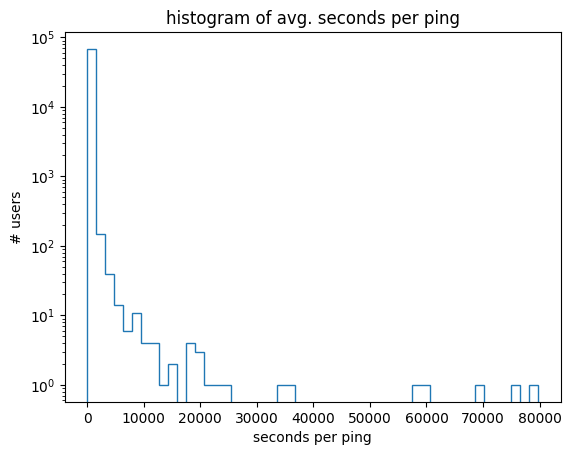

In [55]:
import numpy as np
%matplotlib inline
plt.figure()
plt.stairs(*np.histogram(list(sec_per_ping.values()), bins=50))
plt.yscale('log')

plt.xlabel('seconds per ping')
plt.ylabel('# users')

plt.title('histogram of avg. seconds per ping')

In [52]:
list(sec_per_ping.keys())[np.argmax(list(sec_per_ping.values()))]

5716

In [54]:
[x['oneSecondAggregatedEventCounts'] for x in jsdata if x['user_id'] == 5716]

[{'level_completed': 1},
 {'social_feed_impression': 1},
 {'social_feed_impression': 1, 'milestone_made_5_friends': 1},
 {'level_completed': 1},
 {'milestone_made_5_friends': 1},
 {'ping': 1, 'player_interaction': 1, 'loaded_Dawn': 1, 'level_loaded': 1}]

In [7]:
def sum_chat_msgs_by_user(data):
    user_chat_counts = {}

    for entry in data:
        user_id = entry['user_id']
        event_counts = entry.get('oneSecondAggregatedEventCounts', {})

        if 'chat_msg' in event_counts:
            count = event_counts['chat_msg']
            user_chat_counts[user_id] = user_chat_counts.get(user_id, 0) + count

    return user_chat_counts

user_chat_counts = sum_chat_msgs_by_user(jsdata)
print(user_chat_counts)

{144: 216, 199: 14, 275: 4, 55: 42, 341: 4, 377: 11, 314: 2, 307: 8, 66: 1, 337: 6, 330: 9, 443: 48, 111: 10, 429: 70, 512: 8, 114: 2, 174: 35, 196: 36, 81: 22, 204: 17, 450: 12, 471: 176, 430: 3, 455: 9, 125: 286, 491: 34, 218: 15, 435: 3, 415: 2, 43: 7, 165: 10, 555: 5, 47: 3, 135: 6, 362: 6, 537: 4, 36: 57, 420: 18, 528: 7, 488: 3, 464: 3, 18: 48, 159: 1, 625: 13, 355: 1, 497: 9, 626: 16, 99: 3, 8: 2, 220: 2, 678: 50, 687: 1, 76: 4, 578: 22, 331: 3, 129: 1, 734: 12, 187: 1, 709: 31, 113: 1, 706: 3, 719: 18, 342: 4, 766: 22, 764: 24, 511: 11, 380: 22, 394: 8, 703: 4, 52: 6, 623: 1, 629: 3, 822: 2, 826: 2, 656: 10, 838: 4, 781: 14, 514: 1, 837: 6, 800: 9, 755: 18, 871: 12, 878: 40, 763: 1, 864: 14, 291: 1, 881: 9, 888: 2, 774: 10, 897: 3, 733: 7, 772: 8, 875: 3, 704: 3, 898: 10, 632: 1, 863: 10, 874: 2, 306: 2, 967: 6, 251: 4, 903: 3, 965: 5, 84: 1, 910: 1, 850: 1, 844: 13, 963: 8, 872: 1, 962: 5, 505: 2, 33: 1, 1122: 28, 680: 41, 1132: 30, 857: 92, 928: 2, 1119: 73, 155: 1, 1049: 61,

In [77]:
def chat_counts_by_country(data):
    country_chat_counts = {}

    for entry in data:
        country_code = entry.get('country_code', 'Unknown')
        event_counts = entry.get('oneSecondAggregatedEventCounts', {})

        chat_count = event_counts.get('chat_msg', 0)

        if country_code not in country_chat_counts:
            country_chat_counts[country_code] = 0

        country_chat_counts[country_code] += chat_count

    return country_chat_counts

country_chat_counts = chat_counts_by_country(jsdata)
print(country_chat_counts)


{'US': 10225, 'CA': 1058, 'TW': 3543, 'BR': 5425, 'SA': 838, 'ID': 9267, 'GB': 895, 'PE': 587, 'MX': 4317, 'JP': 25268, 'GY': 24, 'AU': 476, 'EC': 718, 'MY': 3460, 'TJ': 1, 'PH': 4159, 'CL': 1183, 'AR': 1305, 'BO': 364, 'VE': 1129, 'DE': 1505, 'PY': 249, 'CO': 1248, 'RU': 3561, 'MM': 768, 'PA': 252, 'VN': 7445, 'HN': 114, 'IN': 2486, 'DO': 650, 'TH': 1312, 'CR': 386, 'TR': 702, 'SG': 238, 'IQ': 933, 'DZ': 387, 'KR': 1345, 'IT': 1206, 'CN': 2443, 'MA': 164, 'HK': 1402, 'LY': 129, 'ES': 648, 'GT': 392, 'PR': 72, 'FR': 1082, 'SV': 315, 'SE': 61, 'TN': 27, 'PK': 304, 'EG': 468, 'NP': 187, 'MN': 3, 'TT': 0, 'PT': 152, 'BY': 118, 'VC': 1, 'PL': 369, 'GR': 83, 'UY': 171, 'NI': 226, 'RO': 119, 'DK': 173, 'NZ': 111, 'QA': 28, 'UA': 267, 'AW': 1, 'BH': 2, 'GH': 1, 'BN': 208, 'AG': 0, 'SK': 14, 'NL': 370, 'KW': 117, 'BD': 88, 'IR': 19, 'BB': 3, 'GU': 12, 'ZA': 151, 'RS': 71, 'GE': 17, 'KH': 98, 'JM': 18, 'LK': 8, 'HU': 24, 'LB': 6, 'JO': 117, 'IE': 129, 'AL': 0, 'PF': 24, 'GA': 0, 'NO': 160, 'IL'

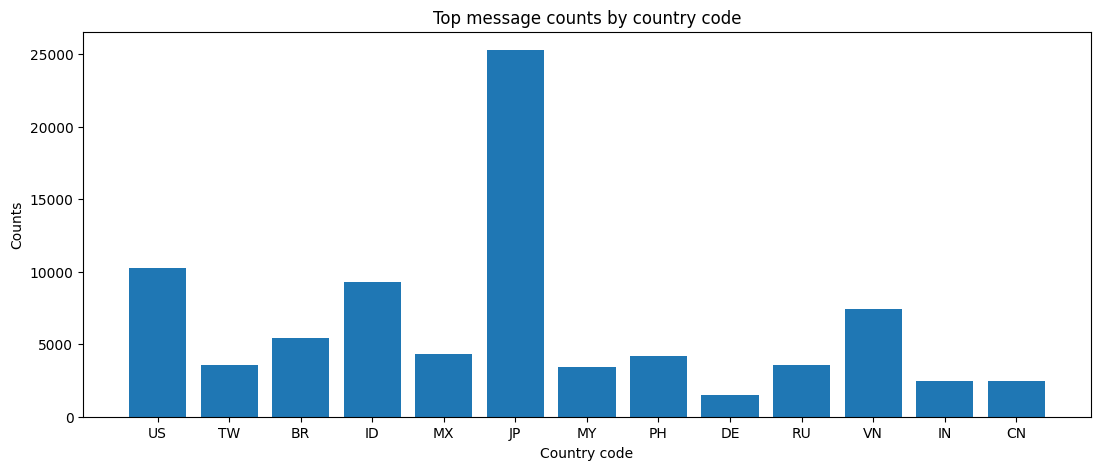

In [84]:
kv = []
vv = []
for key, value in country_chat_counts.items():
    if value > 1500:
        kv.append(key)
        vv.append(value)

fig, ax = plt.subplots(figsize=(13,5))
y_pos = np.arange(len(vv))
hbars = ax.bar(y_pos, vv, align='center')
ax.set_xticks(y_pos, labels=list(kv));

plt.xlabel('Country code')
plt.ylabel('Counts')
plt.title('Top message counts by country code');